In [1]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, uniform
import pandas as pd
from library import *

n_samples = 1000
n_runs = 100
a, b = 0, 1
N_VARIANCES = 500

In [2]:
methods = [
    direct_sampling,
    control_variates,
    importance_sampling,
    stratified_sampling,
    antithetic_sampling
]

f = lambda x: x**2

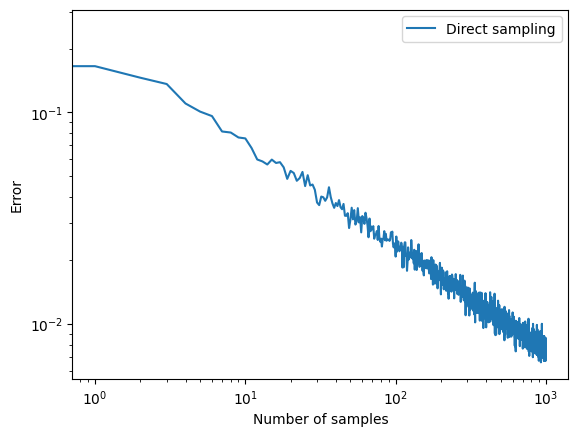

Variance for n=1000 samples: 0.08464638787810307


In [3]:
# Direct sampling
error_direct = np.zeros(n_samples)
variances = np.zeros(n_samples)
for i in range(n_runs):
    for n in range(1, n_samples + 1):
        y = direct_sampling(f, 0, 1, n)
        error_direct[n - 1] += np.abs(y - 1 / 3)
error_direct /= n_runs
    
plt.loglog(error_direct, label='Direct sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance for n=100 samples
variance_direct = np.var([direct_sampling(f, a, b, 1000) for _ in range(N_VARIANCES)])*1000
print('Variance for n=1000 samples:', variance_direct)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


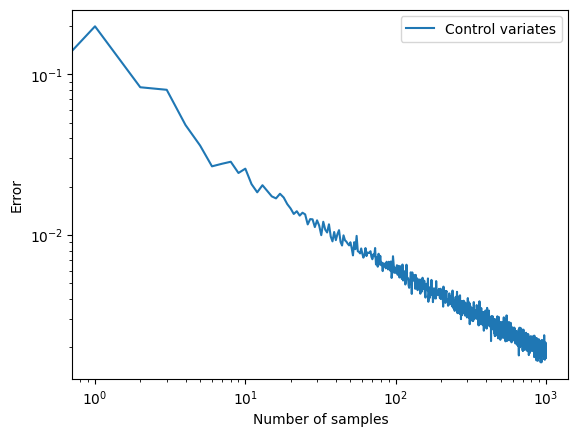

Variance of variance control technique: 0.0049362366226105665


In [4]:
# Control variates
error_control = np.zeros(n_samples, dtype=float)
variances = np.zeros(n_samples, dtype=float)
for n in range(2, n_samples + 1):
    means = []
    for i in range(n_runs):
        y = control_variates(f, 0, 1, n)
        error_control[n - 1] += np.abs(y - 1 / 3)
    variances[n-1] = np.var(means)
error_control /= n_runs

# Plot the results
plt.loglog(error_control, label='Control variates')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance for n=100 samples
variance_control = np.var([control_variates(f, a, b, 1000) for _ in range(N_VARIANCES)]) * 1000
print('Variance of variance control technique:', variance_control)

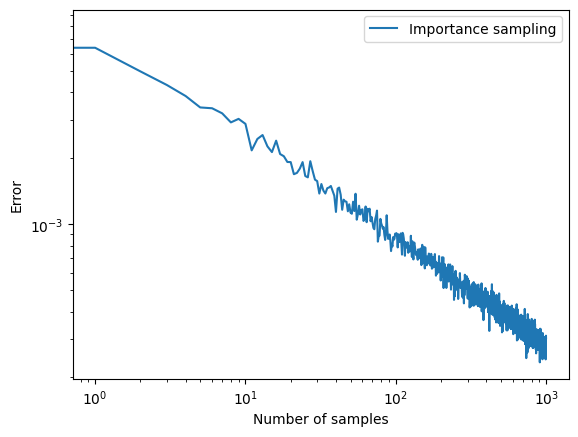

Variance of the importance sampling method:  0.00012670346741740072


In [5]:
# Importance sampling
error_importance = np.zeros(n_samples, dtype=float)
alfa, betax = 2.9, 1

variances = np.zeros(n_samples, dtype=float)
for n in range(1, n_samples + 1):
    means = []
    for i in range(n_runs):
        x = beta.rvs(alfa, betax, size=n)
        y = x ** 2 / beta.pdf(x, alfa, betax)
        error_importance[n - 1] += np.abs(np.mean(y) - 1 / 3)
        means.append(np.mean(y))
    variances[n-1] = np.var(means)
error_importance /= n_runs

# Plot the results
plt.loglog(error_importance, label='Importance sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance with this method
means = []
for i in range(N_VARIANCES):
    x = beta.rvs(alfa, betax, size=1000)
    y = x ** 2 / beta.pdf(x, alfa, betax)
    means.append(np.mean(y))
var_importance = np.var(means)*1000
print('Variance of the importance sampling method: ', var_importance)

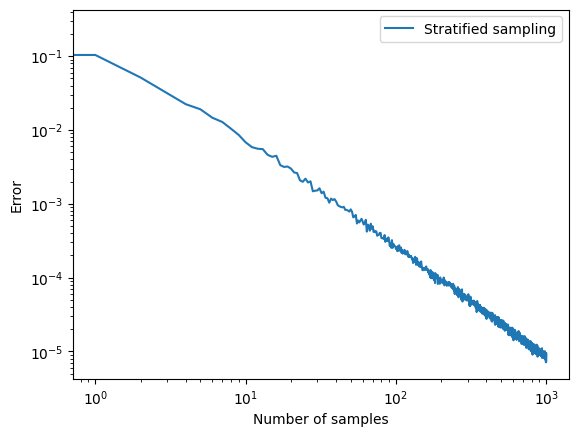

Variance of the stratified sampling method:  1.1523108741197286e-07


In [6]:
# Stratified sampling
error_stratified = np.zeros(n_samples, dtype=float)
variances = np.zeros(n_samples, dtype=float)
for n in range(1, n_samples + 1):
    means = []
    for i in range(n_runs):
        y = stratified_sampling(f, 0, 1, n)
        error_stratified[n - 1] += np.abs(y - 1 / 3)
        means.append(y)
    variances[n-1] = np.var(means)
error_stratified /= n_runs

# Plot the results
plt.loglog(error_stratified, label='Stratified sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance with this method
variance_stratified = np.var([stratified_sampling(f, a, b, 1000) for _ in range(N_VARIANCES)]) * 1000
print('Variance of the stratified sampling method: ', variance_stratified)

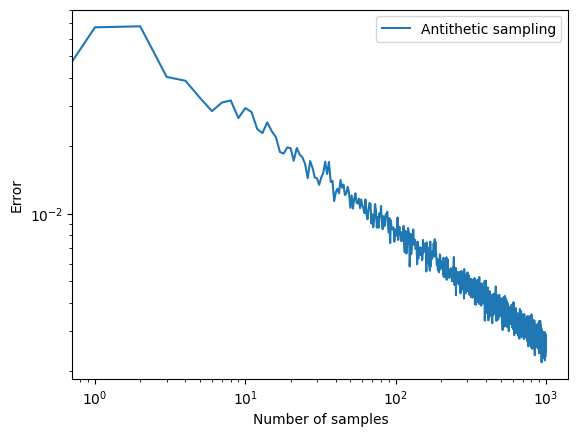

Variance of the antithetic sampling method:  0.010390060284882274


In [7]:
# Antithetic sampling
error_antithetic = np.zeros(n_samples, dtype=float)
for i in range(n_runs):
    for n in range(2, n_samples + 1):
        y = antithetic_sampling(f, a, b, n)
        error_antithetic[n - 1] += np.abs(y - 1 / 3)
error_antithetic /= n_runs

# Plot the results
plt.loglog(error_antithetic, label='Antithetic sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance with this method
variance_antithetic = np.var([antithetic_sampling(f, a, b, 1000) for _ in range(N_VARIANCES)]) * 1000
print('Variance of the antithetic sampling method: ', variance_antithetic)


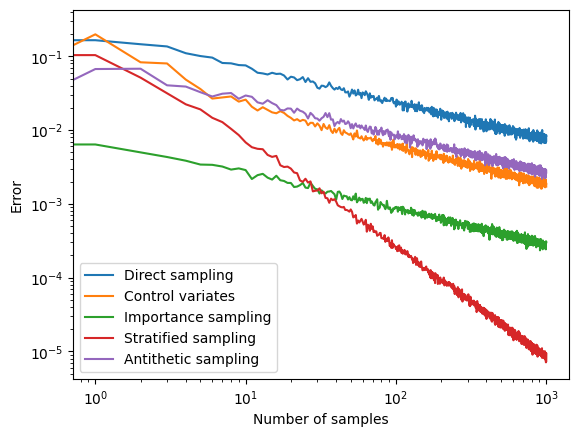

Variance each method: 


,Variance
Direct,8.464639e-02
Control,4.936237e-03
Importance,1.267035e-04
Stratified,1.152311e-07
Antithetic,1.039006e-02


In [8]:
# Plot the results
plt.loglog(error_direct, label='Direct sampling')
plt.loglog(error_control, label='Control variates')
plt.loglog(error_importance, label='Importance sampling')
plt.loglog(error_stratified, label='Stratified sampling')
plt.loglog(error_antithetic, label='Antithetic sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Create a table with the variance and mean of each method
variances = [variance_direct, variance_control, var_importance, variance_stratified, variance_antithetic]

table = np.zeros((5, 1))
table[:, 0] = variances
print('Variance each method: ')
pd.DataFrame(table, columns=['Variance'], index=['Direct', 'Control', 'Importance', 'Stratified', 'Antithetic'])


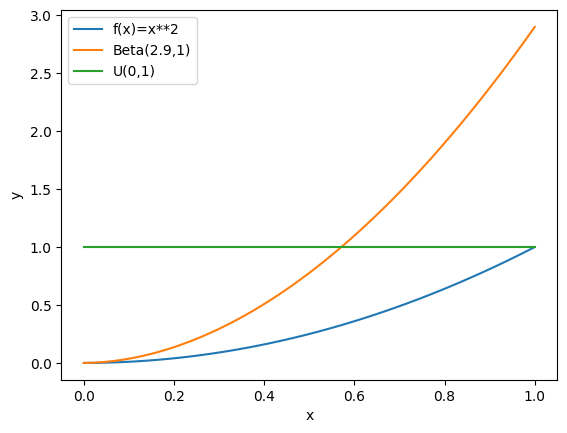

In [9]:
# Plot of Beta(4,2) and y=x**2
x = np.linspace(0, 1, 100)
y = x ** 2
plt.plot(x, y, label='f(x)=x**2')
plt.plot(x, beta.pdf(x, 2.9, 1), label='Beta(2.9,1)')
plt.plot(x, uniform.pdf(x,0,1), label='U(0,1)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()